In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [2]:
file_path = '/Users/parthsdambhare/Documents/Enc/Customer churn prediction/Churn_Modelling.csv'
data = pd.read_csv(file_path)

print(data.info()) 
print(data.head())
# Preprocessing - encoding categorical variables
label_encoder_geo = LabelEncoder()
label_encoder_gender = LabelEncoder()
data['Geography'] = label_encoder_geo.fit_transform(data['Geography'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

In [3]:
# Define features and target
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(8000, 10) (8000,) (2000, 10) (2000,)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])


In [20]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# Check if MPS (Apple GPU support) is available, fallback to CPU if not
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS on Apple Silicon")
else:
    device = torch.device("cpu")
    print("MPS not available, using CPU")

# Initialize the TabNet model with MPS support
model = TabNetClassifier(device_name=device)
# Convert X and y to float32 (especially for MPS)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# If y is categorical and not already in int format, convert to int32 (TabNet expects this)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# Initialize the TabNet model with MPS support
model = TabNetClassifier(device_name=device)

# Train the model on X_train and y_train using MPS (if available) or CPU
model.fit(
    X_train=X_train,  # Already a DataFrame or NumPy array
    y_train=y_train,  # Already a Series or NumPy array
    eval_set=[(X_test, y_test)],  # Same here, no need for .values
    eval_metric=['accuracy'],
    max_epochs=500,  # Adjust for more epochs if needed
    patience=500,     # Early stopping if no improvement
    batch_size=1024,
    virtual_batch_size=256
)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Using MPS on Apple Silicon


/Users/parthsdambhare/opt/anaconda3/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : mps
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.56584 | val_0_accuracy: 0.805   |  0:00:02s
epoch 1  | loss: 0.49247 | val_0_accuracy: 0.8055  |  0:00:04s
epoch 2  | loss: 0.47977 | val_0_accuracy: 0.8065  |  0:00:05s
epoch 3  | loss: 0.47125 | val_0_accuracy: 0.8045  |  0:00:07s
epoch 4  | loss: 0.45822 | val_0_accuracy: 0.8115  |  0:00:08s
epoch 5  | loss: 0.46129 | val_0_accuracy: 0.8095  |  0:00:10s
epoch 6  | loss: 0.48025 | val_0_accuracy: 0.803   |  0:00:11s
epoch 7  | loss: 0.50058 | val_0_accuracy: 0.8035  |  0:00:13s
epoch 8  | loss: 0.51551 | val_0_accuracy: 0.8075  |  0:00:14s
epoch 9  | loss: 0.49768 | val_0_accuracy: 0.808   |  0:00:16s
epoch 10 | loss: 0.49512 | val_0_accuracy: 0.807   |  0:00:17s
epoch 11 | loss: 0.48471 | val_0_accuracy: 0.8105  |  0:00:18s
epoch 12 | loss: 0.47738 | val_0_accuracy: 0.818   |  0:00:20s
epoch 13 | loss: 0.46733 | val_0_accuracy: 0.821   |  0:00:21s
epoch 14 | loss: 0.45434 | val_0_accuracy: 0.82    |  0:00:23s
epoch 15 | loss: 0.44052 | val_0_accuracy: 0.8225  |  0

/Users/parthsdambhare/opt/anaconda3/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.866


In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # No need for .values

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



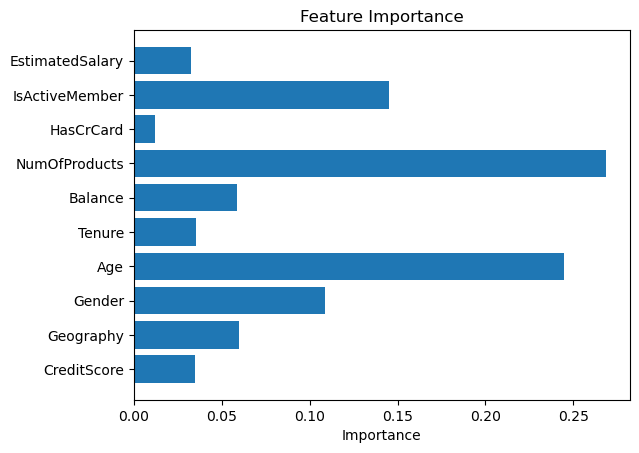

In [23]:
# After training the model
feature_importances = model.feature_importances_

# Use the original DataFrame's columns
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()



In [30]:

from pylatex import Document, Section, Subsection, Command, Itemize
from pylatex.utils import italic, NoEscape

doc = Document()

# Title section
doc.preamble.append(Command('title', 'Parth Dambhare'))
doc.preamble.append(Command('date', NoEscape(r'\today')))
doc.append(NoEscape(r'\maketitle'))

# Education Section
with doc.create(Section('EDUCATION')):
    doc.append('Bachelor of Technology in Civil Engineering \n')
    doc.append('Indian Institute of Technology (ISM) Dhanbad \n')
    doc.append('GPA: 7.33 \n')
    doc.append('OCT 2022 - MAY 2026')

# Work Experience Section
with doc.create(Section('WORK EXPERIENCE')):
    doc.append('Machine Learning Intern - Encryptix \n')
    doc.append('SEP 2024 - OCT 2024')
    with doc.create(Itemize()) as itemize:
        itemize.add_item('Implemented state-of-the-art machine learning models including FastText, TabNet, BERT, DistilBERT, and MobileBERT.')
        itemize.add_item('Engineered a FastText spam detection model with 98.31% accuracy, 0.96 recall, and 0.92 F1 score, and a TabNet churn prediction model (87.65% accuracy, 0.87 recall, 0.92 F1 score).')
        itemize.add_item('Designed a Logistic Regression model for credit card fraud detection (92.38% accuracy, 0.96 recall, 0.95 F1 score).')
        itemize.add_item('Developed a DistilBERT model for movie genre classification (62.35% validation accuracy, 1.230 validation loss).')
        itemize.add_item('Prototyped machine learning applications, assessing their feasibility and viability.')

# Skills Section
with doc.create(Section('SKILLS')):
    doc.append('Languages: Python, C++, C, JavaScript (Node.js), SQL, HTML, CSS \n')
    doc.append('Technologies: TensorFlow, Jupyter Notebook, Keras, NumPy, Pandas, Google Colab, PyTorch, Matplotlib, PIL, Scikit-learn, Git, GitHub, Kaggle, LangChain, Hugging Face, Stable Diffusion \n')
    doc.append('Concepts: Data Structures, AI, Machine Learning, Neural Networks, LLMs, Data Analysis, Containerization, Hyperparameter Tuning, GANs, Supervised/Unsupervised Learning, Reinforcement Learning, NLP, Computer Vision, Time Series Analysis, Research Literature Review')

# Projects Section
with doc.create(Section('PROJECTS')):
    with doc.create(Subsection('Potato Disease Classification')):
        itemize.add_item('Created a multi-platform solution using Python, TensorFlow, FastAPI, and ReactJS, with a mobile app developed in React Native.')
        itemize.add_item('Constructed a CNN trained on potato disease images, achieving 95.87% accuracy.')
        itemize.add_item('Deployed models using TensorFlow Serving and Google Cloud Platform for efficient, scalable predictions.')
    with doc.create(Subsection('Spam Detection Model')):
        itemize.add_item('Formulated a FastText-based machine learning model to classify SMS messages as spam or legitimate.')
        itemize.add_item('Attained 98.31% accuracy, 0.95 recall, and 0.96 F1 score, improving spam filtering.')
    with doc.create(Subsection('Customer Churn Prediction')):
        itemize.add_item('Built a churn prediction model using TabNet for a subscription-based service, analyzing historical customer data.')
        itemize.add_item('Achieved 87.65% accuracy, 0.87 recall, and 0.92 F1 score, helping identify at-risk customers.')

# Achievements Section
with doc.create(Section('ACHIEVEMENTS')):
    with doc.create(Itemize()) as itemize:
        itemize.add_item('Qualified JEE Advanced with AIR: 4468 (OBC)')
        itemize.add_item('Qualified JEE Mains with 98.36 percentile')
        itemize.add_item('Qualified MHT-CET with 99.56 percentile')

# Social Engagements Section
with doc.create(Section('SOCIAL ENGAGEMENTS')):
    with doc.create(Itemize()) as itemize:
        itemize.add_item('Computation Wing Head: Astronomy and Space Technology Club (ASTC), IIT Dhanbad')
        itemize.add_item('Senior Member: FotoFreaks Photography Club, IIT Dhanbad')
        itemize.add_item('Research Head: Civil Placement Cell, IIT Dhanbad')

# Sports Engagements Section
with doc.create(Section('SPORTS ENGAGEMENTS')):
    with doc.create(Itemize()) as itemize:
        itemize.add_item('Archery (State-level)')
        itemize.add_item('Cricket, Badminton')

# Previous Education Section
with doc.create(Section('EDUCATION (Earlier)')):
    with doc.create(Itemize()) as itemize:
        itemize.add_item('Higher Secondary School Certificate, Podar International School, Yavatmal - Percentage: 96% (JULY 2014 - MAY 2020)')
        itemize.add_item('Secondary School Certificate, The English High School, Ner - Percentage: 89.5% (JULY 2020 - MAY 2022)')

# Generate the PDF
doc.generate_pdf("/Users/parthsdambhare/Downloads", clean_tex=False)




CompilerError: No LaTex compiler was found
Either specify a LaTex compiler or make sure you have latexmk or pdfLaTex installed.